In [2]:
"""
Created on Wed Aug  4 17:50:06 2021

@author: amol
"""

from main import *

In [3]:
#Prepare the DataFrame that will be used downstream
dp = DataPreparer()
dp.createPCAs()
dp.sparsePCAs()
dp.zmixOrthogonalPCAs()
df = dp.getDataframe()

'''
print(df[dp.pure_pca_dim_cols].describe().transpose())
print(df[dp.sparse_pca_dim_cols].describe().transpose())
print(df[dp.zmix_pca_dim_cols].describe().transpose())
'''
# currently passing dp eventually we want to abstract all the constants into 1 class
dm = DataManager(df, dp)

In [3]:
'''
1. Run the GP Experiments
'''
exprExec = run_gp_experiments(dm)

In _createTrainTestData Y_test.shape: (12857, 1)
In createTrainTestData Y_test.shape: (12857, 1)


/home/dwyerdei/.conda/envs/rom-project/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


KeyboardInterrupt: 

In [4]:
'''
2. Run the Simple DNN Experiments
'''
exprExec = run_simple_dnn_experiments(dm)

=================== frameworkincludedtrainexcludedtest ===================
------------------ ZmixCpv ------------------
------------------ 2 ------------------
------------------ executeSingleExperiments ------------------
In _createTrainTestData Y_test.shape: (12857, 1)
In createTrainTestData Y_test.shape: (12857, 1)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           96          inputs[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32)           128         dense

KeyboardInterrupt: 

In [ ]:
'''
3. Run the PCDNN_v1 Experiments
'''
exprExec = run_pcdnn_v1_experiments(dm)

In [4]:
'''
4. Run the PCDNN_v2 Experiments
'''
exprExec = run_pcdnn_v2_experiments(dm)

=================== randomequaltraintestsplit ===================
------------------ AllSpeciesAndZmix ------------------
In _createTrainTestData Y_test.shape: (8219, 1)
In createTrainTestData Y_test.shape: (8219,)
--------------------self.build_and_compile_pcdnn_v2_model----------------------
53 2 Y Y Y


NameError: name 'layer_sizes' is not defined

In [8]:
from model_analyzer.model_analysis import *

# NOTE: this code was produced by inspecting the logic flow
# for the last PCDNNv2 experiment to happen in debug mode
# Create dataset for PCDNNV2...
noOfCpv=3
dataSetMethod='AllSpeciesAndZmix_randomequaltraintestsplit'
dm.createTrainTestData(dataSetMethod, noOfCpv, "MinMaxScaler", "MinMaxScaler")

NN = exprExec.model

In _createTrainTestData Y_test.shape: (8219, 1)
In createTrainTestData Y_test.shape: (8219,)


In [9]:
NN_wrapped = NNWrapper(NN)
X_data, Y_data = NN_wrapped.get_XY_data(dm)

Zmix; 259548774.400 +/- 8892595.271
YiCH4; 32060211.200 +/- 1101628.776
YiCO; 2123366.400 +/- 209715.200
YiO2; 1546649.600 +/- 345791.685
YiC2H6; 314572.800 +/- 64211.904
YiH2; 262144.000 +/- 0.000
YiC2H4; 235929.600 +/- 52428.800


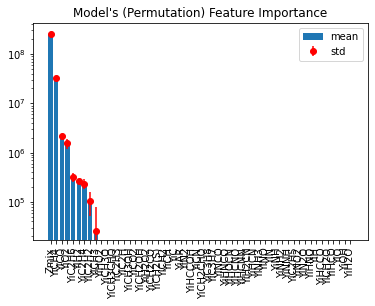

In [10]:
do_perm_feature_importance(NN_wrapped, X_data, Y_data, n_repeats=5)

In [1]:
# this gives us the same dataframe but with only quartiles for each variable
# thereby covering the relevant ranges but much faster
X_chunky=X_data.describe().iloc[3:]
print(X_chunky)

plot_partial_dependence(NN_wrapped, X_chunky, list(range(25)))

NameError: name 'X_data' is not defined